1. (Admission predict Dataset)
Using the supplied predictive variables (GRE score, TOEFL score, University Rating,
etc.) in
the given dataset and predict the admission chance of a new candidate using Linear
Regression.
1. Divide the data into the train-test split of 80:20.
2. Implement the Linear Regression Model to Predict the chances of admission.
3. Implement the Gradient Descent with SSE to Optimize the model for up to 100
iterations and predict the test set.
4. Print the Coefficients of the Optimized model.
5. Print the SSE, MSE, and R2 scores for the Train and Test Sets.

In [1]:
import pandas as pd 

admission_df= pd.read_csv('data/For Assignment 7 Admission_Predict_.csv')
admission_df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
#admission_df.info()
admission_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [3]:
admission_df =admission_df.drop('Serial No.',axis=1) # no use of this data
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

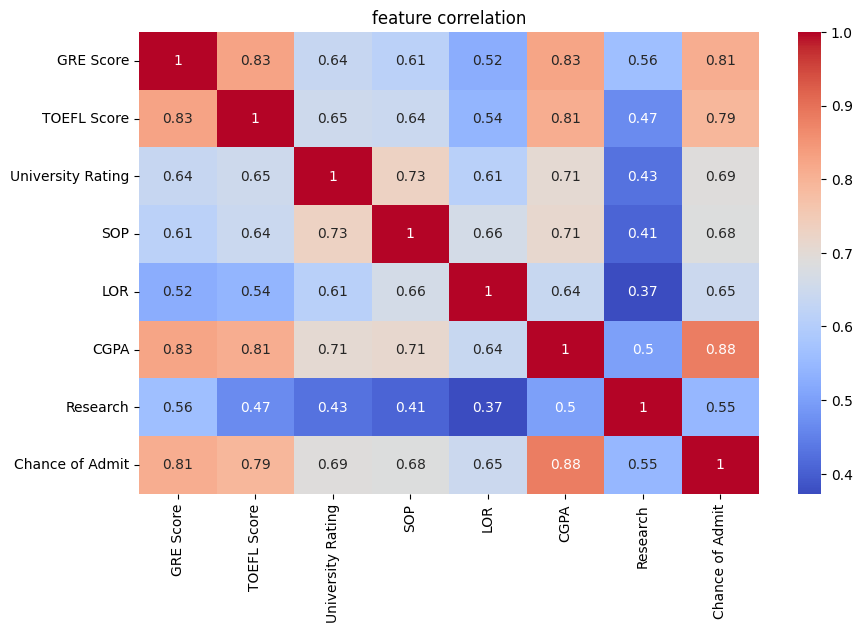

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

admission_corr=admission_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(admission_corr,annot=True,cmap='coolwarm')
plt.title('feature correlation')
plt.show();

In [6]:
admission_df.corr()['Chance of Admit']

GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
CGPA                 0.882413
Research             0.545871
Chance of Admit      1.000000
Name: Chance of Admit, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X= admission_df.drop('Chance of Admit',axis=1)
y=admission_df['Chance of Admit']




In [8]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
y_pred=model.predict(X_test)
#print(y_pred)
y_pred_train=model.predict(X_train)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score


mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)

print('\n Test Set Metrics')
print('\n   mse:',mse)
print('\n   R2',r2)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('\n Train Set Metrics')
print('\n   mse:',mse)
print('\n   R2',r2)



 Test Set Metrics

   mse: 0.0035265554784557574

   R2 0.8188432567829628

 Train Set Metrics

   mse: 0.0037046553987884114

   R2 0.8188432567829628


3. Implement the Gradient Descent with SSE to Optimize the model for up to 100
iterations and predict the test set.
4. Print the Coefficients of the Optimized model.
5. Print the SSE, MSE, and R2 scores for the Train and Test Sets.

In [12]:
#df=admission_df.copy()

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
#y_train.shape
X_test_scaled=scaler.fit_transform(X_test)


from sklearn.linear_model import SGDRegressor

sgd_model=SGDRegressor(max_iter=100,penalty=None,learning_rate='invscaling',eta0=00.1,random_state=42)
sgd_model.fit(X_train_scaled,y_train)


,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [13]:
print('\nIntercept',sgd_model.intercept_)
print('\nCoefficent',sgd_model.coef_)


Intercept [0.73609061]

Coefficent [0.02218282 0.01804983 0.00352384 0.00315845 0.01312564 0.06539126
 0.008361  ]


In [14]:
y_train_pred=sgd_model.predict(X_train_scaled)
y_test_pred=sgd_model.predict(X_test_scaled)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def sse(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

#print('\nSSE: ',sse(y_true,y_pred))

print('\n Test Set')
print('\n SSE : ',sse(y_test,y_test_pred))
print('\n MSE : ',mean_squared_error(y_test_pred,y_test))
print('\n R2: ',r2_score(y_test_pred,y_test))
#y_test_pred



print('\n Train Set')
print('\n SSE : ',sse(y_train,y_train_pred))
print('\n MSE : ',mean_squared_error(y_train_pred,y_train))
print('\n R2: ',r2_score(y_train_pred,y_train))



 Test Set

 SSE :  0.42321939925857327

 MSE :  0.004232193992585733

 R2:  0.708481374333636

 Train Set

 SSE :  1.5036101592517839

 MSE :  0.0037590253981294596

 R2:  0.7315725944193701
